In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Shark Tank India.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the dataframe
print("\nDataFrame Info:")
df.info()

# Get summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

   

In [57]:
# Tidy up Column Names
df.columns = df.columns.str.strip()

# Convert Data Types
df['Original Air Date'] = pd.to_datetime(df['Original Air Date'], format='%d-%b-%y', errors='coerce')
df['Season Start'] = pd.to_datetime(df['Season Start'], format='%d-%b-%y', errors='coerce')
df['Season End'] = pd.to_datetime(df['Season End'], format='%d-%b-%y', errors='coerce')

# Clean and convert 'Cash Burn' to numeric. It has some non-numeric values, so we'll coerce errors.
df['Cash Burn'] = pd.to_numeric(df['Cash Burn'], errors='coerce')

# Handle Missing Values
df['Male Presenters'] = df['Male Presenters'].fillna(0).astype(int)
df['Female Presenters'] = df['Female Presenters'].fillna(0).astype(int)

# For 'Accepted Offer', NaN means no deal was accepted. So, we'll fill NaN with 0.
df['Accepted Offer'] = df['Accepted Offer'].fillna(0).astype(int)

# For deal-specific columns, NaN means no deal. Let's fill these with 0.
deal_cols = ['Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt', 'Deal Valuation', 'Number of Sharks in Deal']
for col in deal_cols:
    df[col] = df[col].fillna(0)

# For individual shark investment columns, NaN means no investment from that shark.
shark_investment_cols = [
    'Namita Investment Amount', 'Namita Investment Equity', 'Namita Debt Amount',
    'Vineeta Investment Amount', 'Vineeta Investment Equity', 'Vineeta Debt Amount',
    'Anupam Investment Amount', 'Anupam Investment Equity', 'Anupam Debt Amount',
    'Aman Investment Amount', 'Aman Investment Equity', 'Aman Debt Amount',
    'Peyush Investment Amount', 'Peyush Investment Equity', 'Peyush Debt Amount',
    'Ritesh Investment Amount', 'Ritesh Investment Equity', 'Ritesh Debt Amount',
    'Amit Investment Amount', 'Amit Investment Equity', 'Amit Debt Amount',
    'Guest Investment Amount', 'Guest Investment Equity', 'Guest Debt Amount'
]
for col in shark_investment_cols:
    df[col] = df[col].fillna(0)

# Refine Categorical Data
print("Unique values in 'Pitchers Average Age':")
print(df['Pitchers Average Age'].unique())

# Clean the 'Pitchers Average Age' column. Let's keep it as categories.
df['Pitchers Average Age'] = df['Pitchers Average Age'].str.strip()

# Display the info of the cleaned dataframe
print("\nCleaned DataFrame Info:")
df.info()

# Let's save the cleaned data to a new CSV file for our Power BI analysis.
df.to_csv('Shark Tank India Cleaned.csv', index=False)

print("\nCleaned data saved to 'Shark Tank India Cleaned.csv'")

Unique values in 'Pitchers Average Age':
['Middle' 'Young' 'Old']

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Season Number              634 non-null    int64         
 1   Startup Name               634 non-null    object        
 2   Episode Number             634 non-null    int64         
 3   Pitch Number               634 non-null    int64         
 4   Season Start               634 non-null    datetime64[ns]
 5   Season End                 634 non-null    datetime64[ns]
 6   Original Air Date          603 non-null    datetime64[ns]
 7   Episode Title              634 non-null    object        
 8   Anchor                     634 non-null    object        
 9   Industry                   634 non-null    object        
 10  Business Description       634 non-null    

Total number of pitches: 634
Number of pitches that received an offer: 423
Number of pitches that accepted an offer: 360
Received offer rate: 66.72%
Accepted offer rate: 56.78%


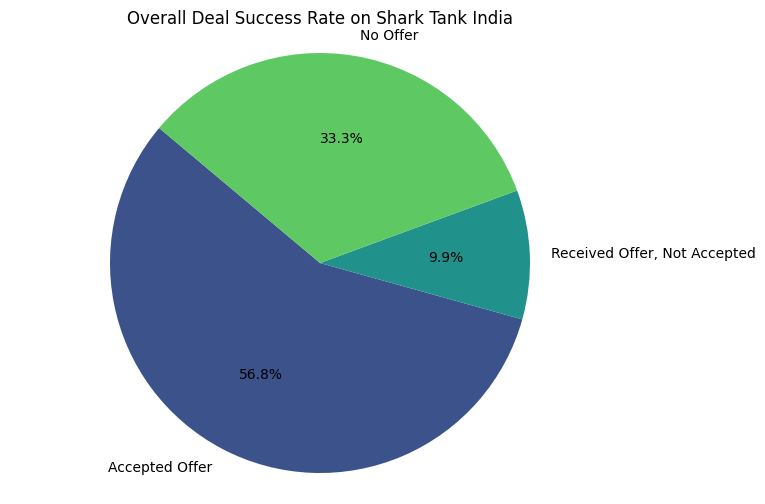

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\89218835.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')


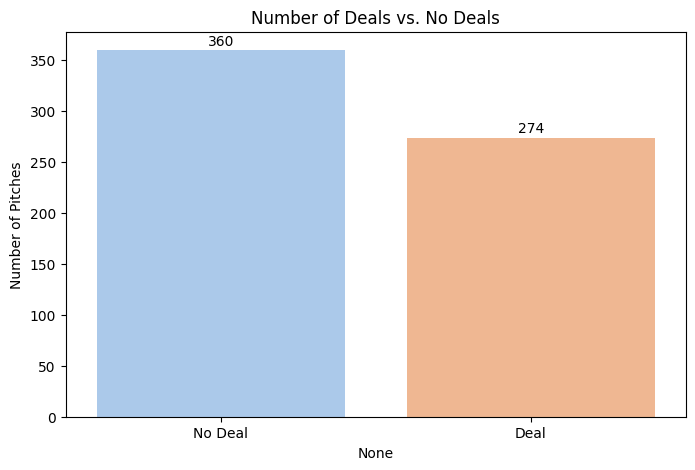

In [58]:
# Calculate the deal success rate
received_offer_count = df['Received Offer'].sum()
accepted_offer_count = df[df['Accepted Offer'] == 1]['Accepted Offer'].count()
total_pitches = len(df)

received_offer_rate = (received_offer_count / total_pitches) * 100
accepted_offer_rate = (accepted_offer_count / total_pitches) * 100

print(f"Total number of pitches: {total_pitches}")
print(f"Number of pitches that received an offer: {received_offer_count}")
print(f"Number of pitches that accepted an offer: {accepted_offer_count}")
print(f"Received offer rate: {received_offer_rate:.2f}%")
print(f"Accepted offer rate: {accepted_offer_rate:.2f}%")

# Visualize the deal success rate
plt.figure(figsize=(8, 6))
labels = ['Accepted Offer', 'Received Offer, Not Accepted', 'No Offer']
sizes = [accepted_offer_count, received_offer_count - accepted_offer_count, total_pitches - received_offer_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(labels)))
plt.title('Overall Deal Success Rate on Shark Tank India')
plt.axis('equal')
plt.savefig('deal_success_rate.png')
plt.show()

# A bar plot for better comparison
plt.figure(figsize=(8, 5))
status_counts = df['Accepted Offer'].value_counts()
status_counts.index = ['No Deal', 'Deal']
sns.barplot(x=status_counts.index, y=status_counts.values, palette='pastel')
plt.title('Number of Deals vs. No Deals')
plt.ylabel('Number of Pitches')
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 5, str(value), ha='center') 
plt.savefig('deals_vs_no_deals.png')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\3871109375.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_industries.values, y=top_10_industries.index, palette='plasma')


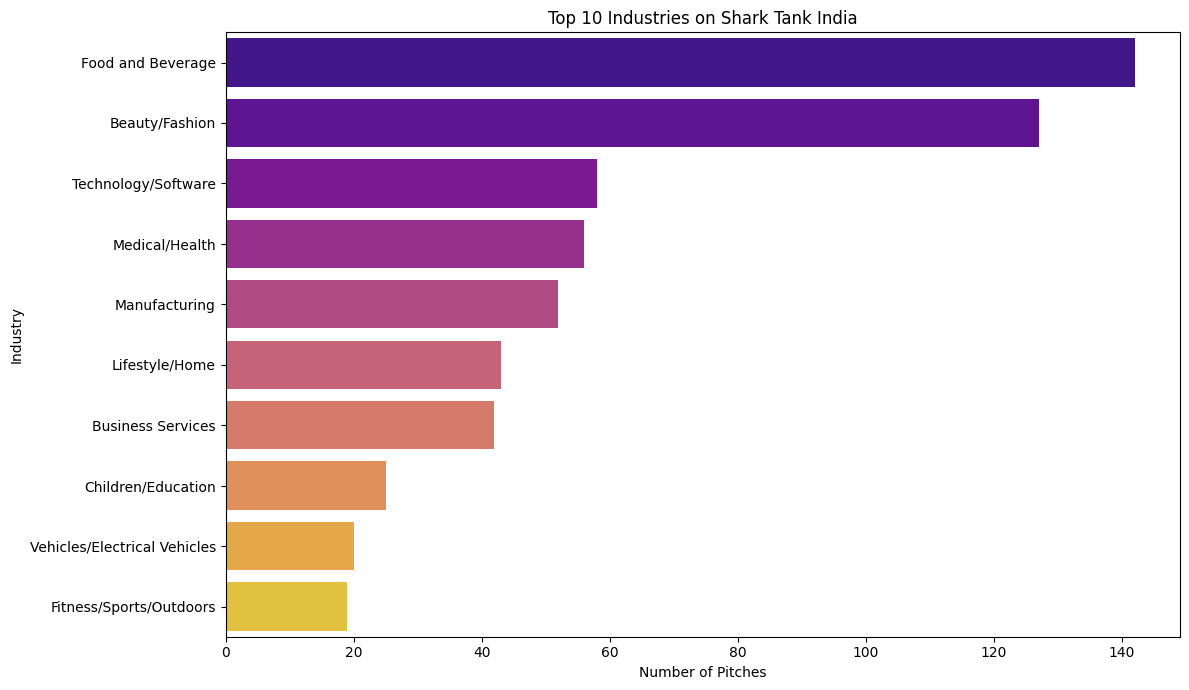

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\3871109375.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_success.values, y=industry_success.index, palette='magma')


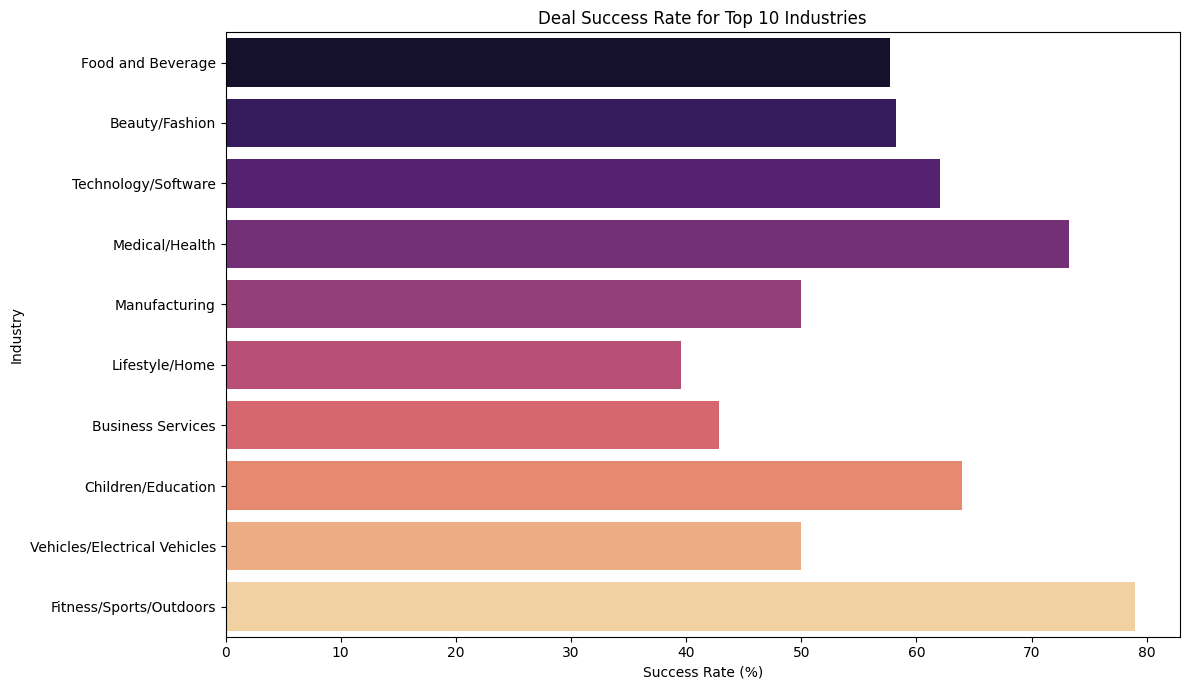


Top 10 Industries by Number of Pitches:
Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Name: count, dtype: int64

Deal Success Rate for Top 10 Industries:
Industry
Food and Beverage               57.746479
Beauty/Fashion                  58.267717
Technology/Software             62.068966
Medical/Health                  73.214286
Manufacturing                   50.000000
Lifestyle/Home                  39.534884
Business Services               42.857143
Children/Education              64.000000
Vehicles/Electrical Vehicles    50.000000
Fitness/Sports/Outdoors         78.947368
Name: Accepted Offer, dtype: float64


In [59]:
# Top 10 industries by number of pitches
top_10_industries = df['Industry'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_industries.values, y=top_10_industries.index, palette='plasma')
plt.title('Top 10 Industries on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('top_10_industries.png')
plt.show()

# Industry success rate (top 10 industries)
industry_success = df.groupby('Industry')['Accepted Offer'].mean().mul(100).sort_values(ascending=False).loc[top_10_industries.index]

plt.figure(figsize=(12, 7))
sns.barplot(x=industry_success.values, y=industry_success.index, palette='magma')
plt.title('Deal Success Rate for Top 10 Industries')
plt.xlabel('Success Rate (%)')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('industry_success_rate.png')
plt.show()

print("\nTop 10 Industries by Number of Pitches:")
print(top_10_industries)

print("\nDeal Success Rate for Top 10 Industries:")
print(industry_success)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1282158370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='rocket')


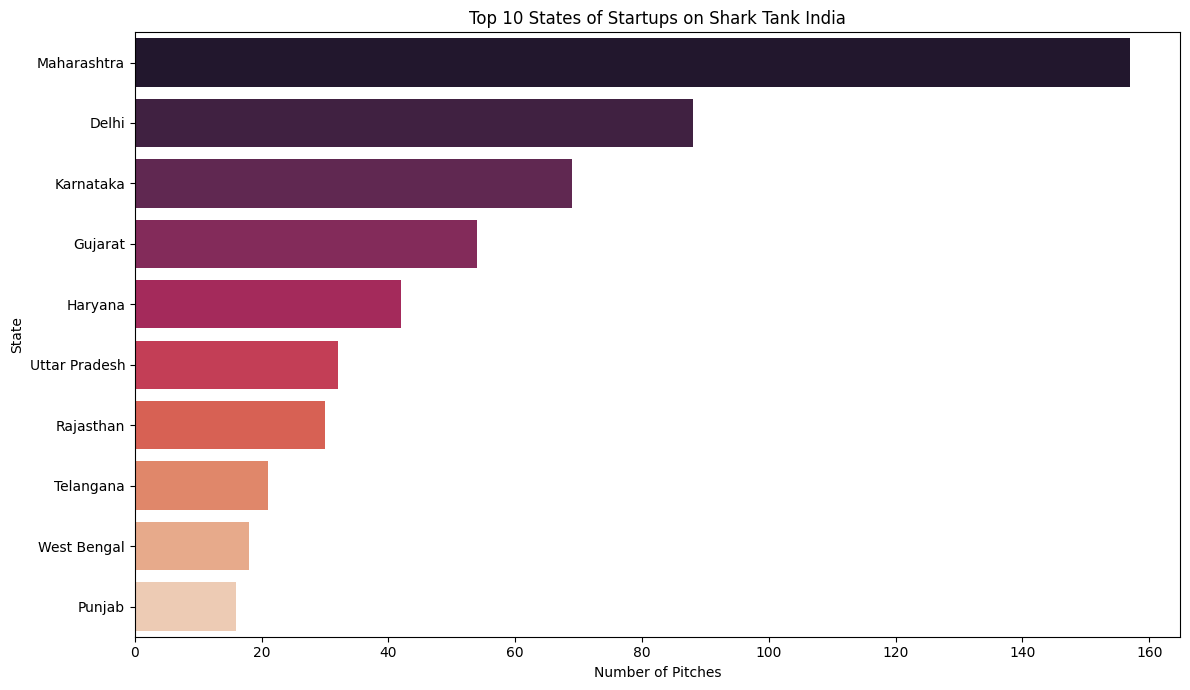


Top 10 States by Number of Pitches:
Pitchers State
Maharashtra      157
Delhi             88
Karnataka         69
Gujarat           54
Haryana           42
Uttar Pradesh     32
Rajasthan         30
Telangana         21
West Bengal       18
Punjab            16
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1282158370.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='muted')


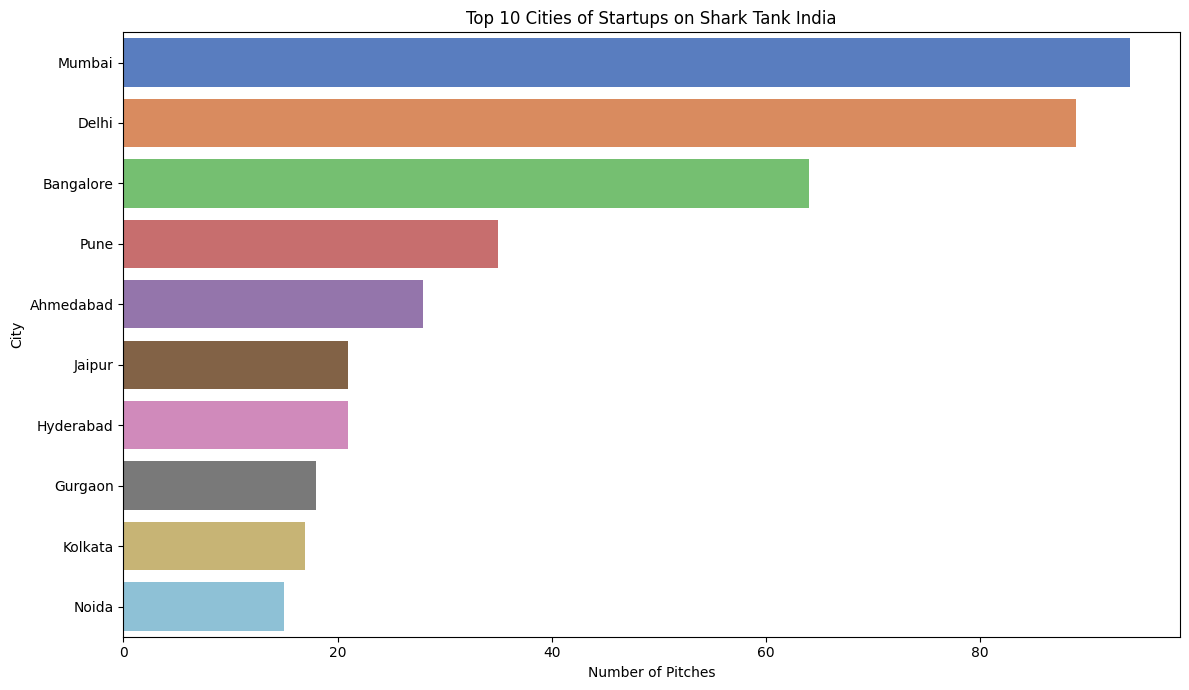


Top 10 Cities by Number of Pitches:
Pitchers City
Mumbai       94
Delhi        89
Bangalore    64
Pune         35
Ahmedabad    28
Jaipur       21
Hyderabad    21
Gurgaon      18
Kolkata      17
Noida        15
Name: count, dtype: int64


In [60]:
# Number of deals and total investment per shark

# Top 10 states by number of pitches
top_10_states = df['Pitchers State'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='rocket')
plt.title('Top 10 States of Startups on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('State')
plt.tight_layout()
plt.savefig('top_10_states.png')
plt.show()

print("\nTop 10 States by Number of Pitches:")
print(top_10_states)

# Top 10 cities by number of pitches
top_10_cities = df['Pitchers City'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='muted')
plt.title('Top 10 Cities of Startups on Shark Tank India')
plt.xlabel('Number of Pitches')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_10_cities.png')
plt.show()

print("\nTop 10 Cities by Number of Pitches:")
print(top_10_cities)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\2537665393.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shark_deals_s.values, y=shark_deals_s.index, palette='crest')


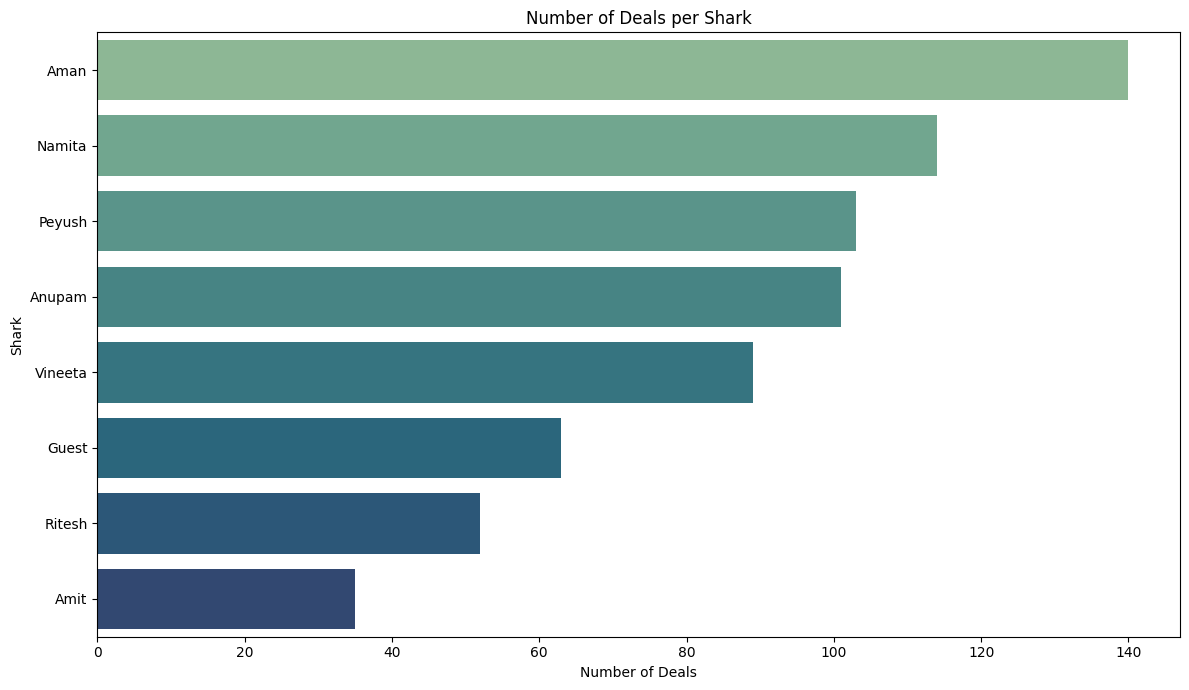

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\2537665393.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shark_total_investment_s.values / 100, y=shark_total_investment_s.index, palette='flare')


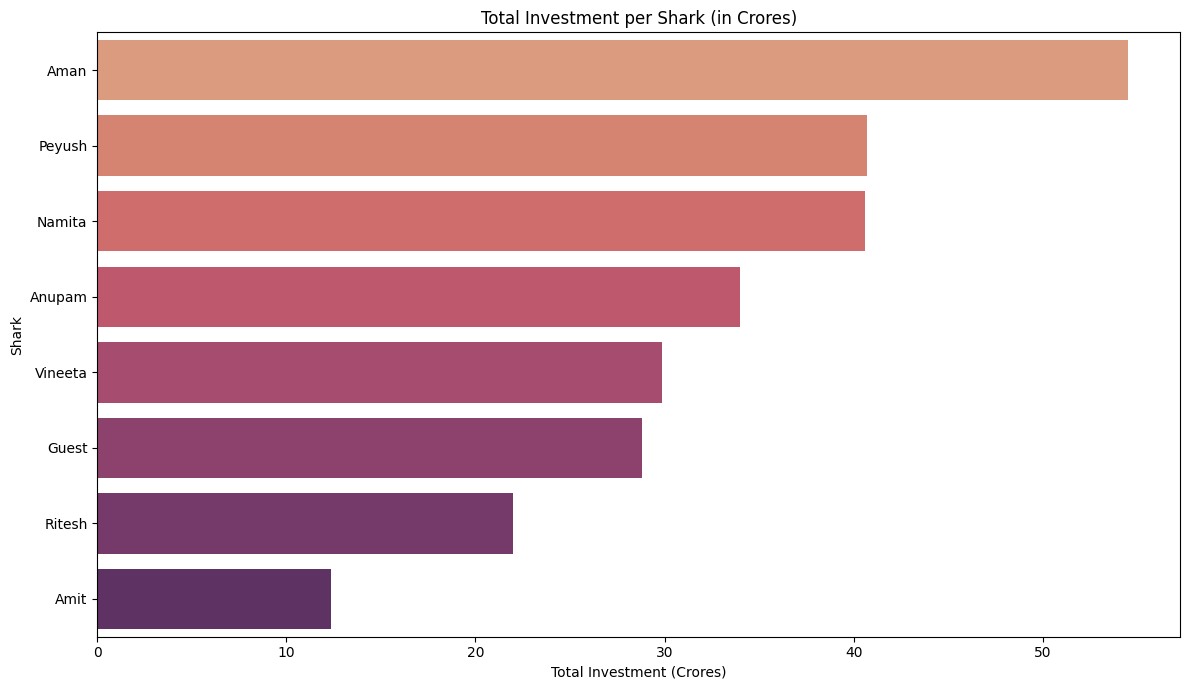


Number of Deals per Shark:
Aman       140
Namita     114
Peyush     103
Anupam     101
Vineeta     89
Guest       63
Ritesh      52
Amit        35
dtype: int64

Total Investment per Shark (in Lakhs):
Aman       5453.717516
Peyush     4072.914753
Namita     4061.839268
Anupam     3397.330768
Vineeta    2987.294500
Guest      2878.682252
Ritesh     2198.484500
Amit       1234.400000
dtype: float64


In [61]:
# Number of deals and total investment per shark
shark_names = ['Namita', 'Vineeta', 'Anupam', 'Aman', 'Peyush', 'Ritesh', 'Amit', 'Guest']

shark_deals = {}
shark_total_investment = {}

for shark in shark_names:
    investment_col = f'{shark} Investment Amount'
    
    shark_deals[shark] = df[df[investment_col] > 0].shape[0]
    
    shark_total_investment[shark] = df[investment_col].sum()

shark_deals_s = pd.Series(shark_deals).sort_values(ascending=False)
shark_total_investment_s = pd.Series(shark_total_investment).sort_values(ascending=False)

# Plot number of deals per shark
plt.figure(figsize=(12, 7))
sns.barplot(x=shark_deals_s.values, y=shark_deals_s.index, palette='crest')
plt.title('Number of Deals per Shark')
plt.xlabel('Number of Deals')
plt.ylabel('Shark')
plt.tight_layout()
plt.savefig('deals_per_shark.png')
plt.show()

# Plot total investment per shark (in Crores)
plt.figure(figsize=(12, 7))
sns.barplot(x=shark_total_investment_s.values / 100, y=shark_total_investment_s.index, palette='flare') 
plt.title('Total Investment per Shark (in Crores)')
plt.xlabel('Total Investment (Crores)')
plt.ylabel('Shark')
plt.tight_layout()
plt.savefig('investment_per_shark.png')
plt.show()

print("\nNumber of Deals per Shark:")
print(shark_deals_s)

print("\nTotal Investment per Shark (in Lakhs):")
print(shark_total_investment_s)

- Guest Investor Investment Summary -
Kunal Bahl          965.531000
Ashneer Grover      539.330000
Azhar Iqubal        364.998000
Deepinder Goyal     200.000000
Radhika Gupta       197.500000
Ghazal Alagh        159.990252
Varun Dua           148.333000
Viraj Bahl           95.000000
Chirag Nakrani       75.000000
Ronnie Screwvala     67.500000
Vikas D Nahar        65.500000
dtype: float64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\2384645536.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guest_investment_summary.values / 100, y=guest_investment_summary.index, palette='YlGnBu_r')


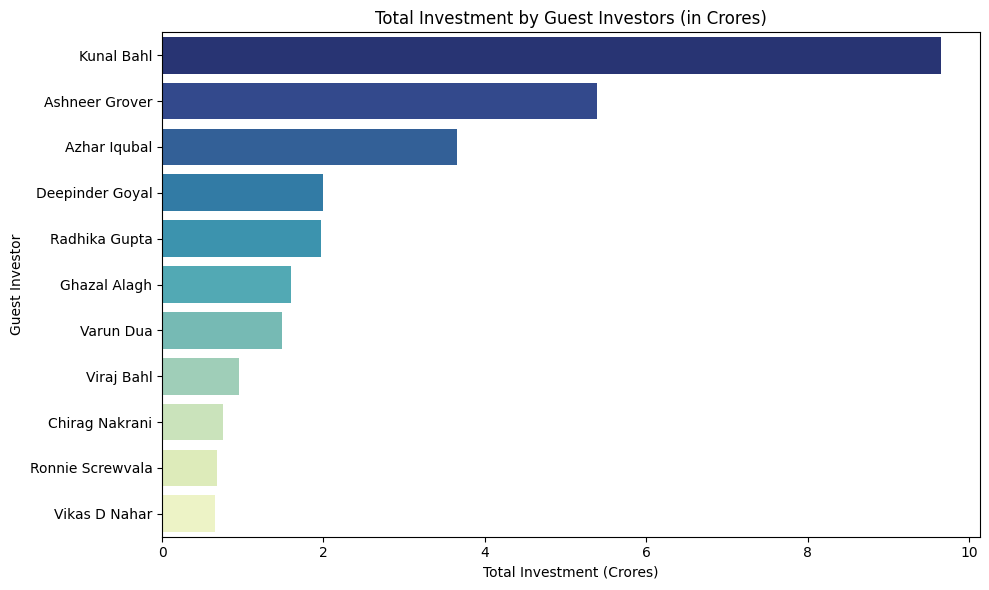

In [62]:
# Guest Investor Investments

guest_investments = df[df['Guest Investment Amount'] > 0].copy()

individual_guest_investments = {}

for index, row in guest_investments.iterrows():
    investors = str(row['Invested Guest Name']).split(',')
    num_investors = len(investors)

    investment_per_investor = row['Guest Investment Amount'] / num_investors
    
    for investor in investors:
        investor_name = investor.strip()
        individual_guest_investments[investor_name] = individual_guest_investments.get(investor_name, 0) + investment_per_investor

guest_investment_summary = pd.Series(individual_guest_investments).sort_values(ascending=False)

print("- Guest Investor Investment Summary -")
print(guest_investment_summary)

# Visualize guest investor investments
plt.figure(figsize=(10, 6))
sns.barplot(x=guest_investment_summary.values / 100, y=guest_investment_summary.index, palette='YlGnBu_r') 
plt.title('Total Investment by Guest Investors (in Crores)')
plt.xlabel('Total Investment (Crores)')
plt.ylabel('Guest Investor')
plt.tight_layout()
plt.savefig('guest_investor_investments.png')
plt.show()


--- Top 5 Favorite Industries for Guest Investors ---
Industry
Food and Beverage      16
Beauty/Fashion         14
Medical/Health          6
Technology/Software     6
Manufacturing           5
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=guest_favorite_industries.values, y=guest_favorite_industries.index, palette='autumn')


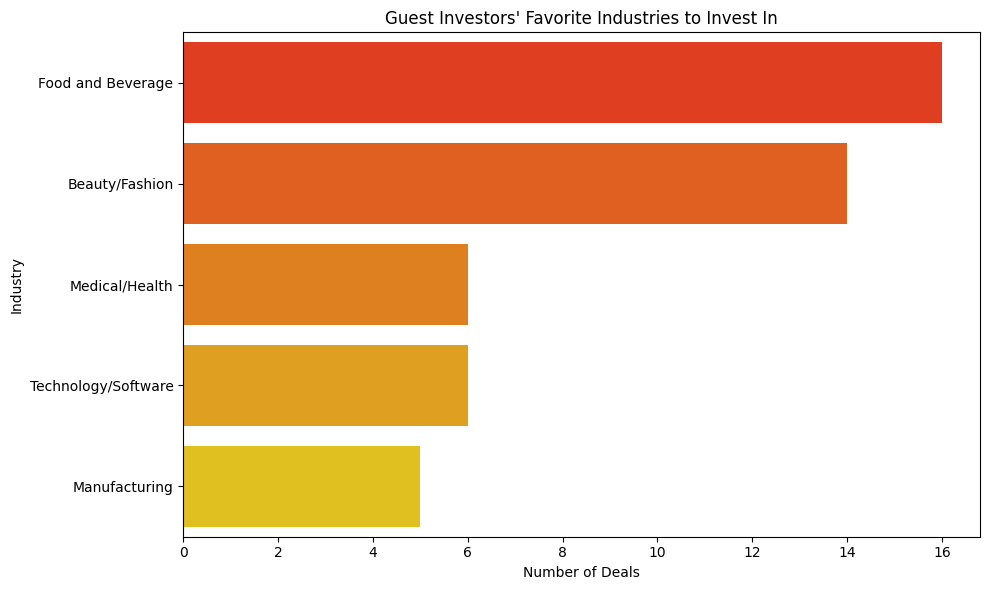


--- Top 5 Favorite Industries for Main Sharks ---

--- Namita's Top 5 Industries ---
Industry
Beauty/Fashion         25
Medical/Health         22
Food and Beverage      18
Manufacturing           9
Technology/Software     9
Name: count, dtype: int64

--- Vineeta's Top 5 Industries ---
Industry
Food and Beverage          28
Beauty/Fashion             21
Lifestyle/Home              7
Medical/Health              6
Fitness/Sports/Outdoors     5
Name: count, dtype: int64

--- Anupam's Top 5 Industries ---
Industry
Beauty/Fashion        25
Food and Beverage     24
Medical/Health        14
Manufacturing          8
Children/Education     6
Name: count, dtype: int64

--- Aman's Top 5 Industries ---
Industry
Beauty/Fashion         31
Food and Beverage      30
Medical/Health         18
Technology/Software    15
Manufacturing          10
Name: count, dtype: int64

--- Peyush's Top 5 Industries ---
Industry
Food and Beverage      17
Medical/Health         16
Beauty/Fashion         14
Technology/So

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aman_fav_ind.values, y=aman_fav_ind.index, palette='winter')


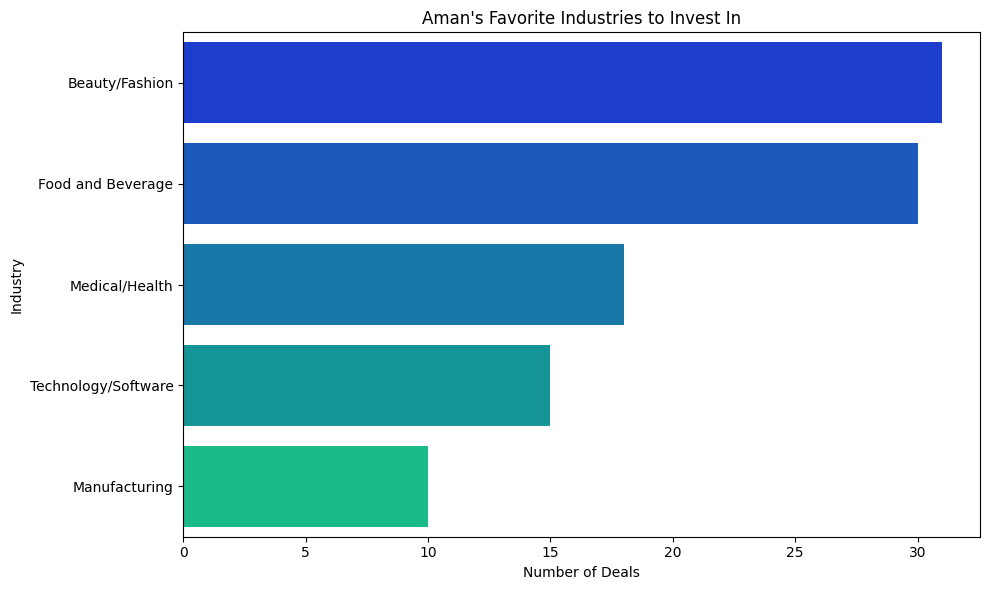

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=namita_fav_ind.values, y=namita_fav_ind.index, palette='YlGn')


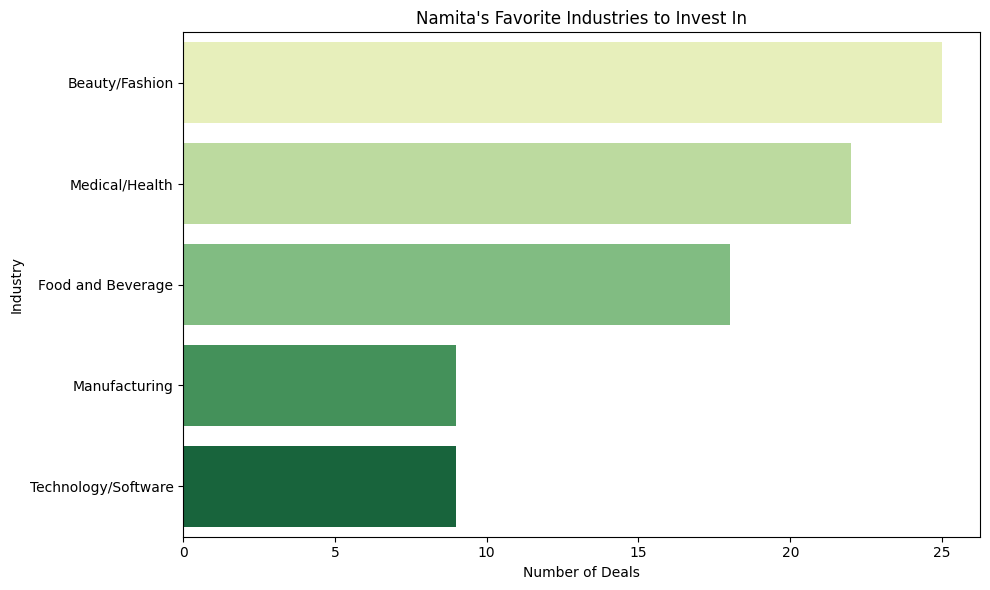

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amit_fav_ind.values, y=amit_fav_ind.index, palette='ocean')


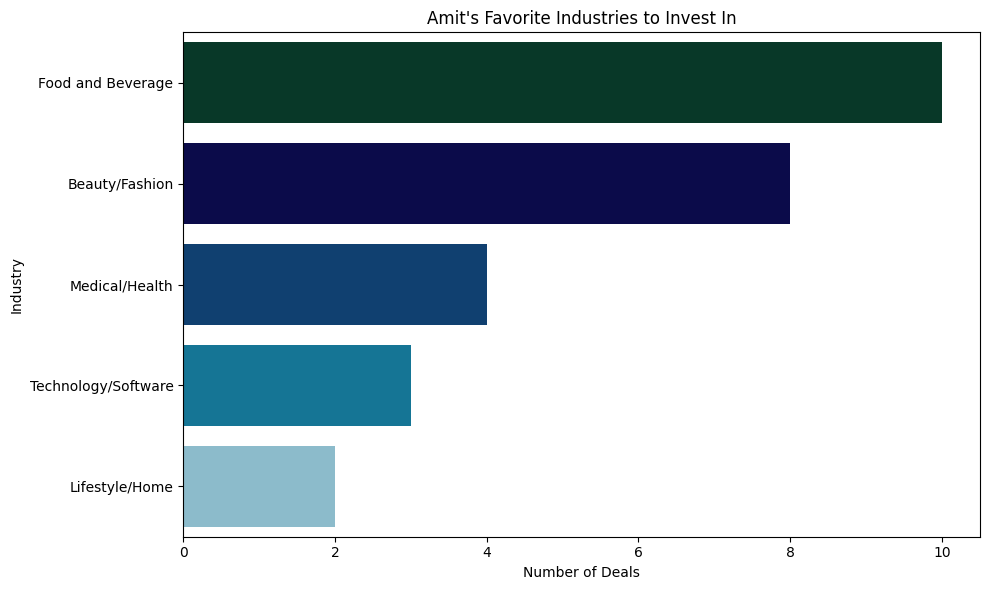

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vineeta_fav_ind.values, y=vineeta_fav_ind.index, palette='gist_yarg')


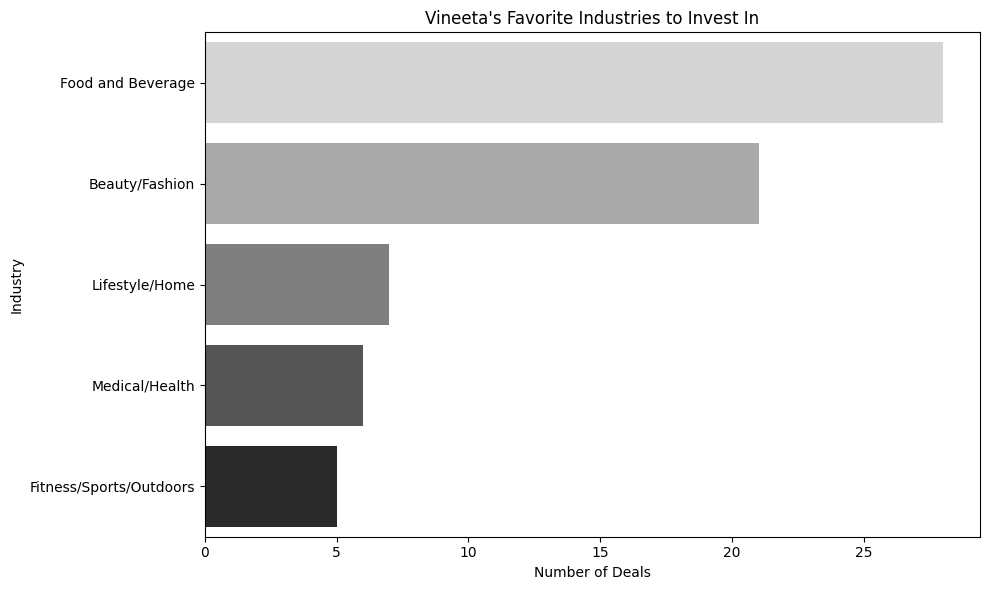

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anupam_fav_ind.values, y=anupam_fav_ind.index, palette='viridis')


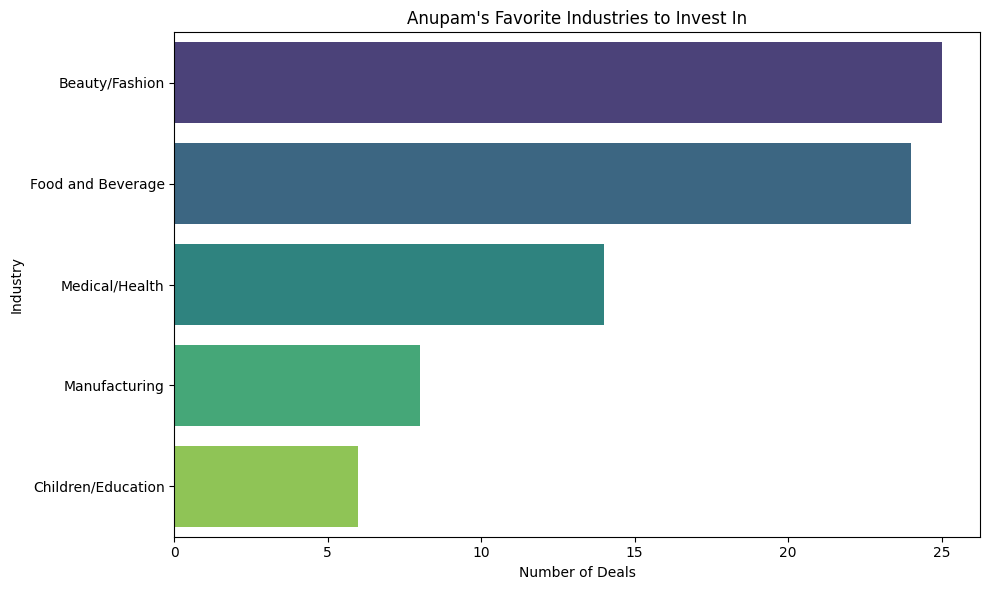

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peyush_fav_ind.values, y=peyush_fav_ind.index, palette='mako')


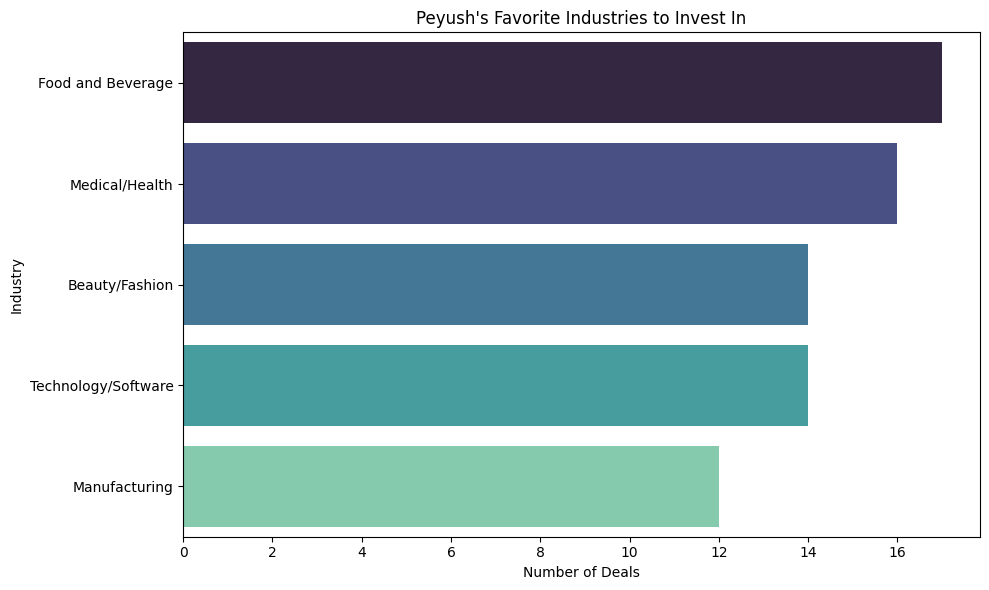

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1089066111.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ritesh_fav_ind.values, y=ritesh_fav_ind.index, palette='copper')


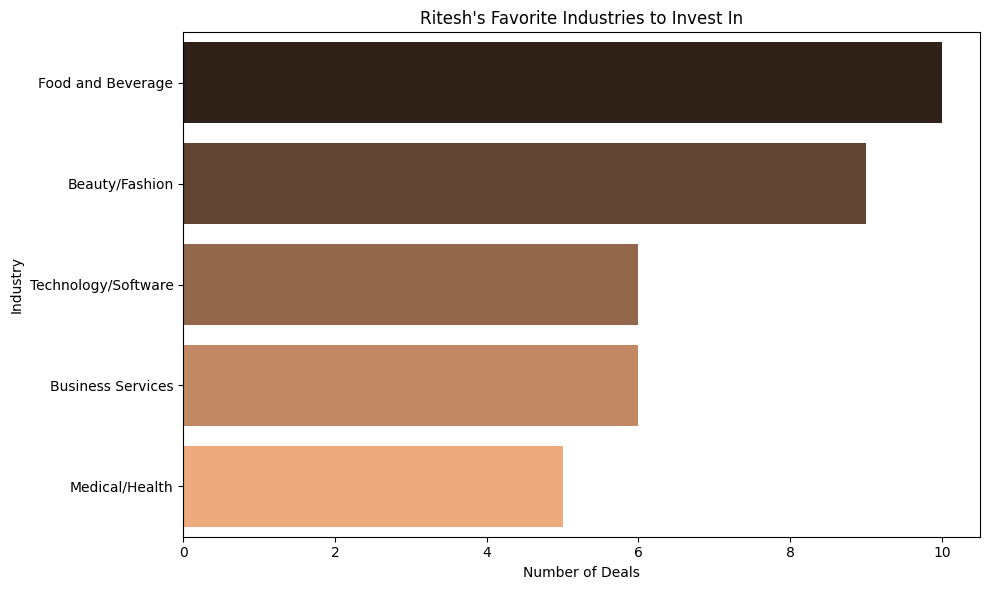

In [63]:
# Favorite Industries for Investment

# Favorite Industries for Guest Investors
guest_favorite_industries = df[df['Guest Investment Amount'] > 0]['Industry'].value_counts().nlargest(5)

print("\n--- Top 5 Favorite Industries for Guest Investors ---")
print(guest_favorite_industries)

# Guest Investors' Favorite Industries Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=guest_favorite_industries.values, y=guest_favorite_industries.index, palette='autumn')
plt.title("Guest Investors' Favorite Industries to Invest In")
plt.xlabel('Number of Deals')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('guest_favorite_industries.png')
plt.show()


# Favorite Industries for Main Sharks
main_sharks = ['Namita', 'Vineeta', 'Anupam', 'Aman', 'Peyush', 'Ritesh', 'Amit']
shark_favorite_industries = {}

for shark in main_sharks:
    shark_investments = df[df[f'{shark} Investment Amount'] > 0]
    top_industries = shark_investments['Industry'].value_counts().nlargest(5)
    shark_favorite_industries[shark] = top_industries

print("\n--- Top 5 Favorite Industries for Main Sharks ---")
for shark, industries in shark_favorite_industries.items():
    print(f"\n--- {shark}'s Top 5 Industries ---")
    print(industries)

# Main Sharks' Favorite Industries Visualizations

# Aman's Favorite Industries
aman_fav_ind = shark_favorite_industries.get('Aman')
if aman_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aman_fav_ind.values, y=aman_fav_ind.index, palette='winter')
    plt.title("Aman's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('aman_favorite_industries.png')
    plt.show()

# Namita's Favorite Industries
namita_fav_ind = shark_favorite_industries.get('Namita')
if namita_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=namita_fav_ind.values, y=namita_fav_ind.index, palette='YlGn')
    plt.title("Namita's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('namita_favorite_industries.png')
    plt.show()

# Amit's Favorite Industries
amit_fav_ind = shark_favorite_industries.get('Amit')
if amit_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=amit_fav_ind.values, y=amit_fav_ind.index, palette='ocean')
    plt.title("Amit's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('amit_favorite_industries.png')
    plt.show()

# Vineeta's Favorite Industries
vineeta_fav_ind = shark_favorite_industries.get('Vineeta')
if vineeta_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=vineeta_fav_ind.values, y=vineeta_fav_ind.index, palette='gist_yarg')
    plt.title("Vineeta's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('vineeta_favorite_industries.png')
    plt.show()

# Anupam's Favorite Industries
anupam_fav_ind = shark_favorite_industries.get('Anupam')
if anupam_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=anupam_fav_ind.values, y=anupam_fav_ind.index, palette='viridis')
    plt.title("Anupam's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('anupam_favorite_industries.png')
    plt.show()

# Peyush's Favorite Industries
peyush_fav_ind = shark_favorite_industries.get('Peyush')
if peyush_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=peyush_fav_ind.values, y=peyush_fav_ind.index, palette='mako')
    plt.title("Peyush's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('peyush_favorite_industries.png')
    plt.show()

# Ritesh's Favorite Industries
ritesh_fav_ind = shark_favorite_industries.get('Ritesh')
if ritesh_fav_ind is not None:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ritesh_fav_ind.values, y=ritesh_fav_ind.index, palette='copper')
    plt.title("Ritesh's Favorite Industries to Invest In")
    plt.xlabel('Number of Deals')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.savefig('ritesh_favorite_industries.png')
    plt.show()

--- Top 10 Least Invested-In Industries ---
Industry
Entertainment                    1
Hardware                         1
Animal/Pets                      2
Others                           2
Electronics                      3
Liquor/Alcohol                   3
Agriculture                      5
Green/CleanTech                  8
Vehicles/Electrical Vehicles    10
Fitness/Sports/Outdoors         15
Name: count, dtype: int64


C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1973131037.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_invested_industries.values, y=least_invested_industries.index, palette='coolwarm')


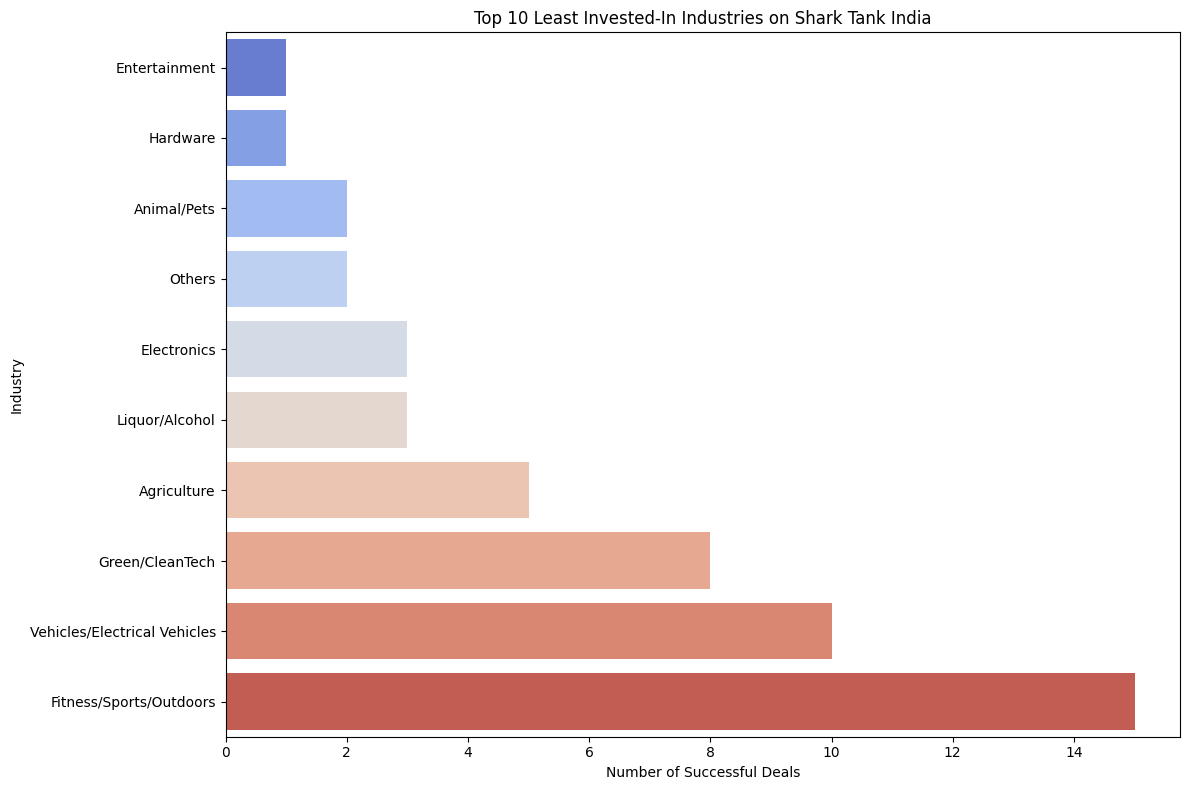

In [64]:
# Analysis of Least Invested-In Industries
successful_deals = df[df['Accepted Offer'] == 1]

least_invested_industries = successful_deals['Industry'].value_counts().nsmallest(10)

print("--- Top 10 Least Invested-In Industries ---")
print(least_invested_industries)

# Visualize the least invested-in industries
plt.figure(figsize=(12, 8))
sns.barplot(x=least_invested_industries.values, y=least_invested_industries.index, palette='coolwarm')
plt.title('Top 10 Least Invested-In Industries on Shark Tank India')
plt.xlabel('Number of Successful Deals')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('least_invested_industries.png')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\1957490879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deals_per_season.index, y=deals_per_season.values, palette='Blues_d')


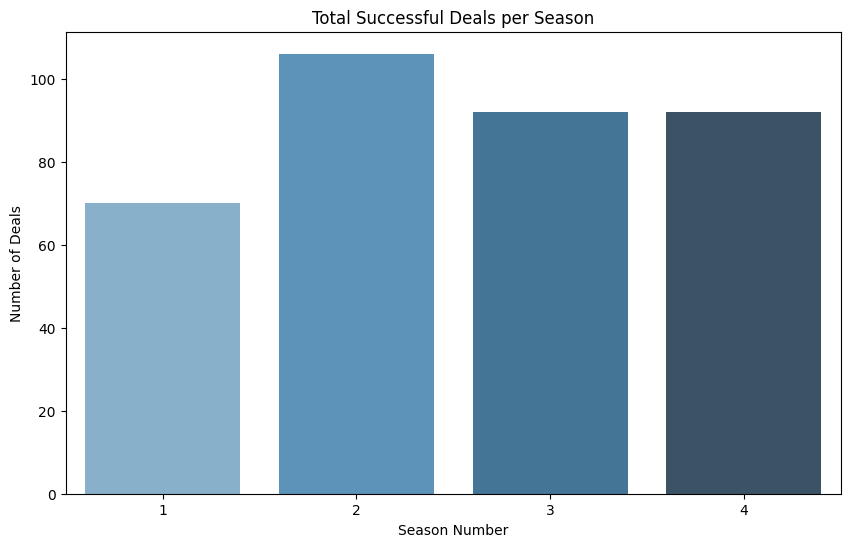

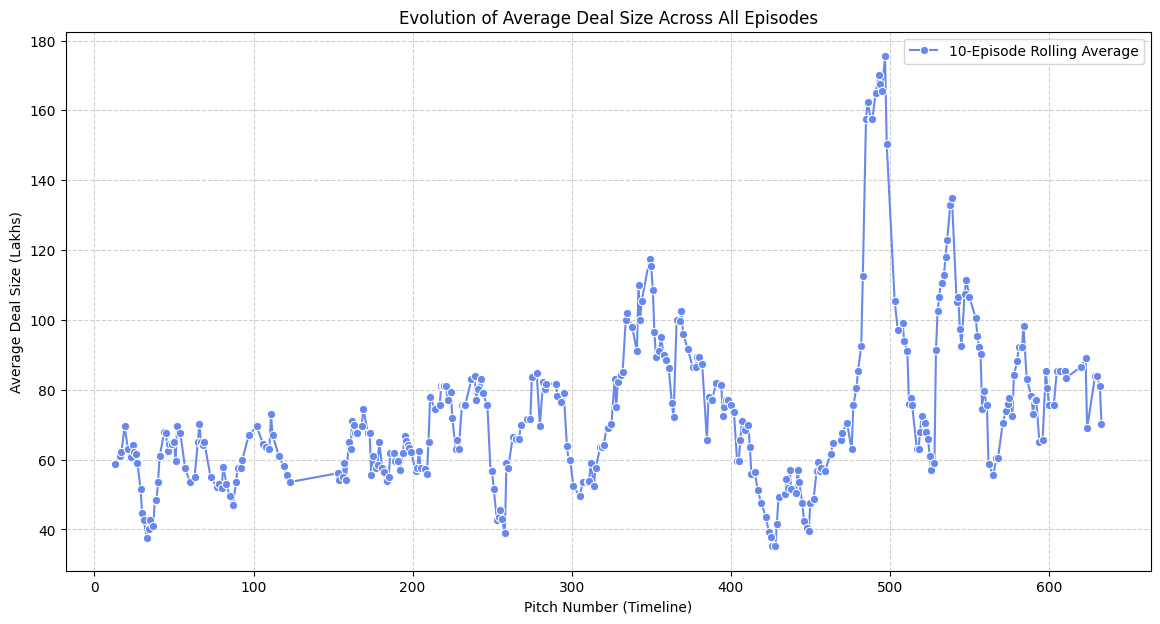

In [65]:
# Analyze trends over time
# Deals per Season
deals_per_season = df.groupby('Season Number')['Accepted Offer'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=deals_per_season.index, y=deals_per_season.values, palette='Blues_d')
plt.title('Total Successful Deals per Season')
plt.xlabel('Season Number')
plt.ylabel('Number of Deals')
plt.savefig('successful_deals_per_season.png')
plt.show()

# Average Ticket Size Evolution (Rolling Average)
successful_deals = df[df['Accepted Offer'] == 1].copy()
successful_deals['Rolling Avg Deal Size'] = successful_deals['Total Deal Amount'].rolling(window=10).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=successful_deals['Pitch Number'], y=successful_deals['Rolling Avg Deal Size'], marker='o', label='10-Episode Rolling Average')
plt.title('Evolution of Average Deal Size Across All Episodes')
plt.xlabel('Pitch Number (Timeline)')
plt.ylabel('Average Deal Size (Lakhs)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('average_deal_size.png')
plt.show()


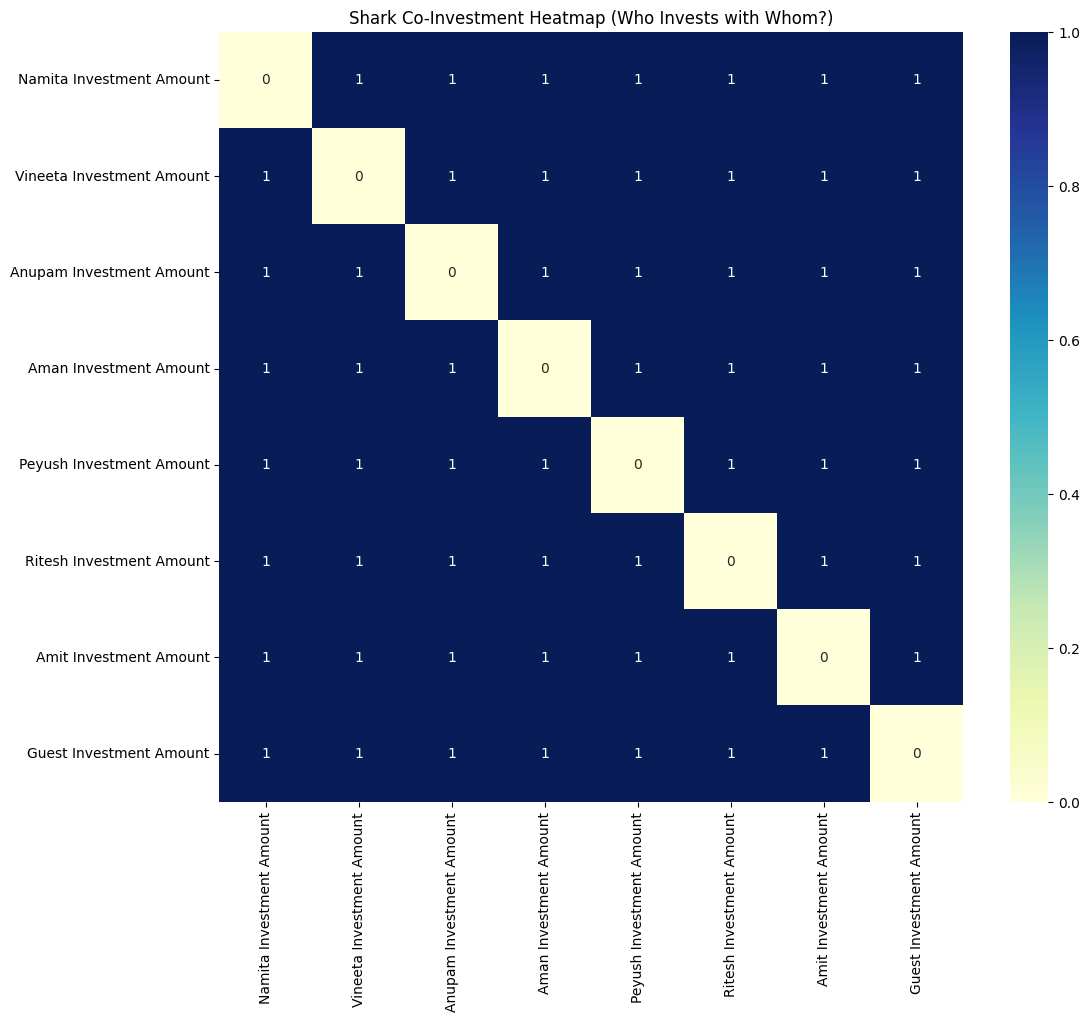

In [66]:
# Co-Investment Heatmap to show which sharks tend to invest together
shark_names = ['Namita', 'Vineeta', 'Anupam', 'Aman', 'Peyush', 'Ritesh', 'Amit', 'Guest']
investment_cols = [f'{name} Investment Amount' for name in shark_names]
invested_df = df[investment_cols][df['Number of Sharks in Deal'] > 1] > 0

co_investment_matrix = invested_df.T.dot(invested_df)

co_investment_matrix = co_investment_matrix.astype(int)

for i in range(len(shark_names)):
    co_investment_matrix.iloc[i, i] = 0

plt.figure(figsize=(12, 10))
sns.heatmap(co_investment_matrix, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Shark Co-Investment Heatmap (Who Invests with Whom?)')
plt.savefig('co_investment.png')
plt.show()

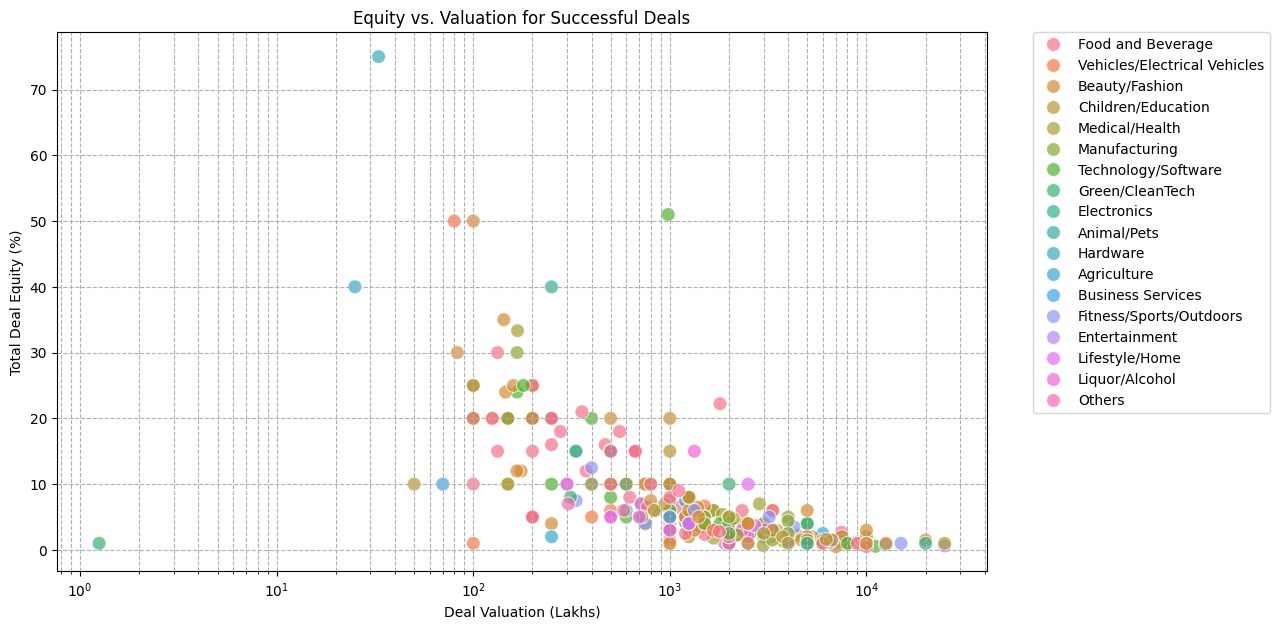

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\3229608493.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=deals_top_industries, x='Total Deal Equity', y='Industry', palette='Set2')


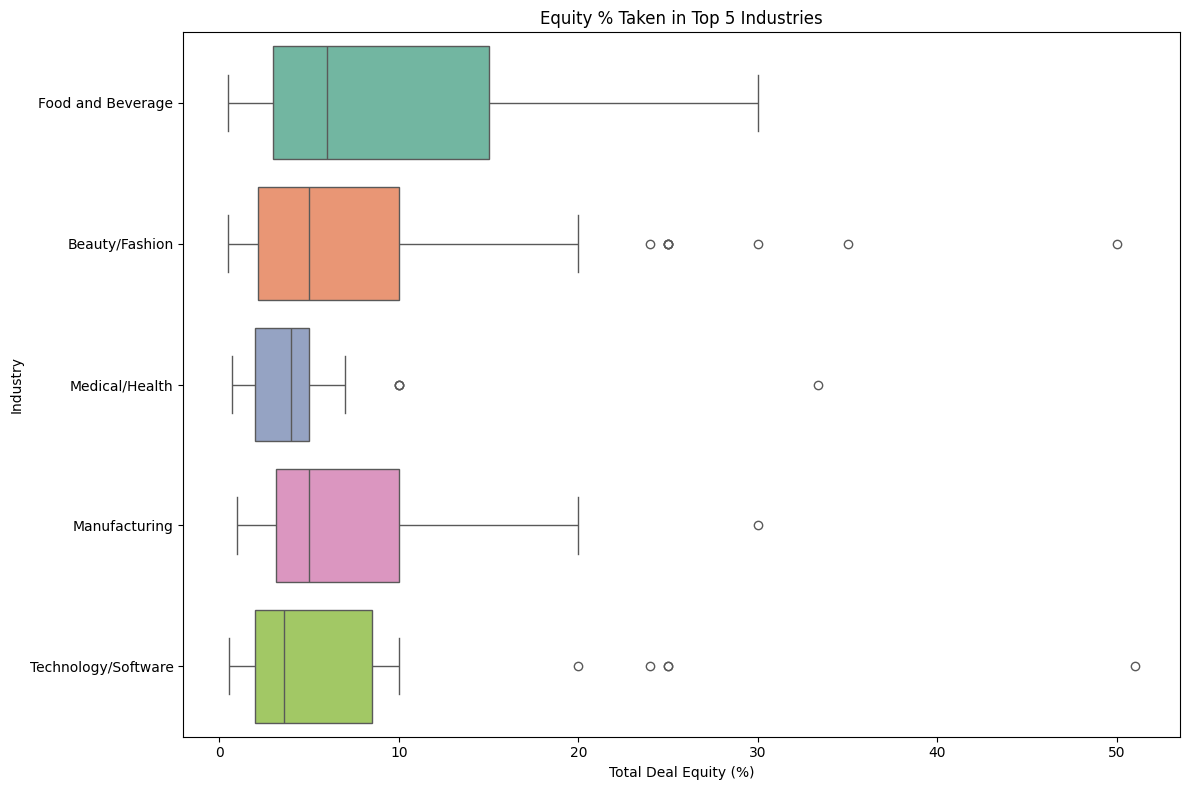

In [67]:
# Equity Analysis

# Equity vs. Valuation Analysis
deals_df = df[df['Accepted Offer'] == 1].copy()

plt.figure(figsize=(12, 7))
sns.scatterplot(data=deals_df, x='Deal Valuation', y='Total Deal Equity', hue='Industry', s=100, alpha=0.7)
plt.title('Equity vs. Valuation for Successful Deals')
plt.xlabel('Deal Valuation (Lakhs)')
plt.ylabel('Total Deal Equity (%)')
plt.xscale('log') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, which="both", ls="--")
plt.savefig('equity_vs_valuation.png')
plt.show()

# Equity Taken by Top 5 Industries 
top_5_industries = deals_df['Industry'].value_counts().nlargest(5).index
deals_top_industries = deals_df[deals_df['Industry'].isin(top_5_industries)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=deals_top_industries, x='Total Deal Equity', y='Industry', palette='Set2')
plt.title('Equity % Taken in Top 5 Industries')
plt.xlabel('Total Deal Equity (%)')
plt.ylabel('Industry')
plt.tight_layout()
plt.savefig('equity_top_5_industries.png')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\544421961.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_success_rate.index, y=gender_success_rate.values, palette='viridis')


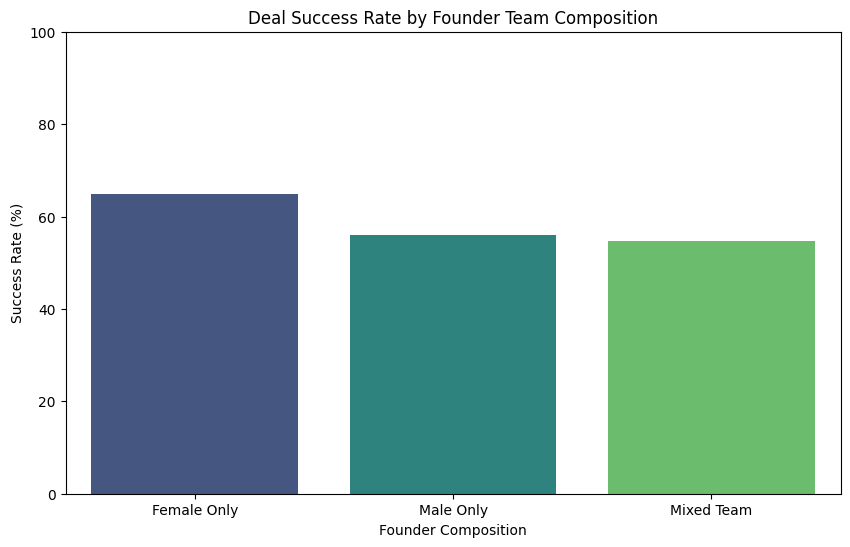

C:\Users\KIIT\AppData\Local\Temp\ipykernel_142928\544421961.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_size_by_gender.index, y=deal_size_by_gender.values, palette='magma')


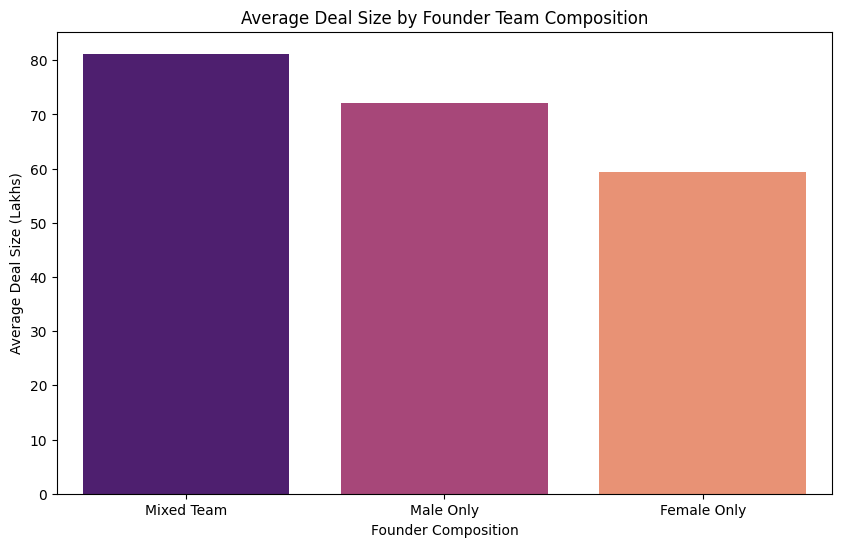

In [68]:
# Gender Composition Analysis

conditions = [
    (df['Male Presenters'] > 0) & (df['Female Presenters'] == 0),
    (df['Female Presenters'] > 0) & (df['Male Presenters'] == 0),
    (df['Male Presenters'] > 0) & (df['Female Presenters'] > 0)
]
choices = ['Male Only', 'Female Only', 'Mixed Team']
df['Founder Composition'] = np.select(conditions, choices, default='Other')

# Success Rate by Gender Composition 
gender_success_rate = df.groupby('Founder Composition')['Accepted Offer'].mean().mul(100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_success_rate.index, y=gender_success_rate.values, palette='viridis')
plt.title('Deal Success Rate by Founder Team Composition')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.savefig('success_rate_by_founder_composition.png')
plt.show()

# Average Deal Size by Gender Composition 
deal_size_by_gender = df[df['Accepted Offer'] == 1].groupby('Founder Composition')['Total Deal Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=deal_size_by_gender.index, y=deal_size_by_gender.values, palette='magma')
plt.title('Average Deal Size by Founder Team Composition')
plt.ylabel('Average Deal Size (Lakhs)')
plt.savefig('average_deal_size_by_founder_composition.png')
plt.show()

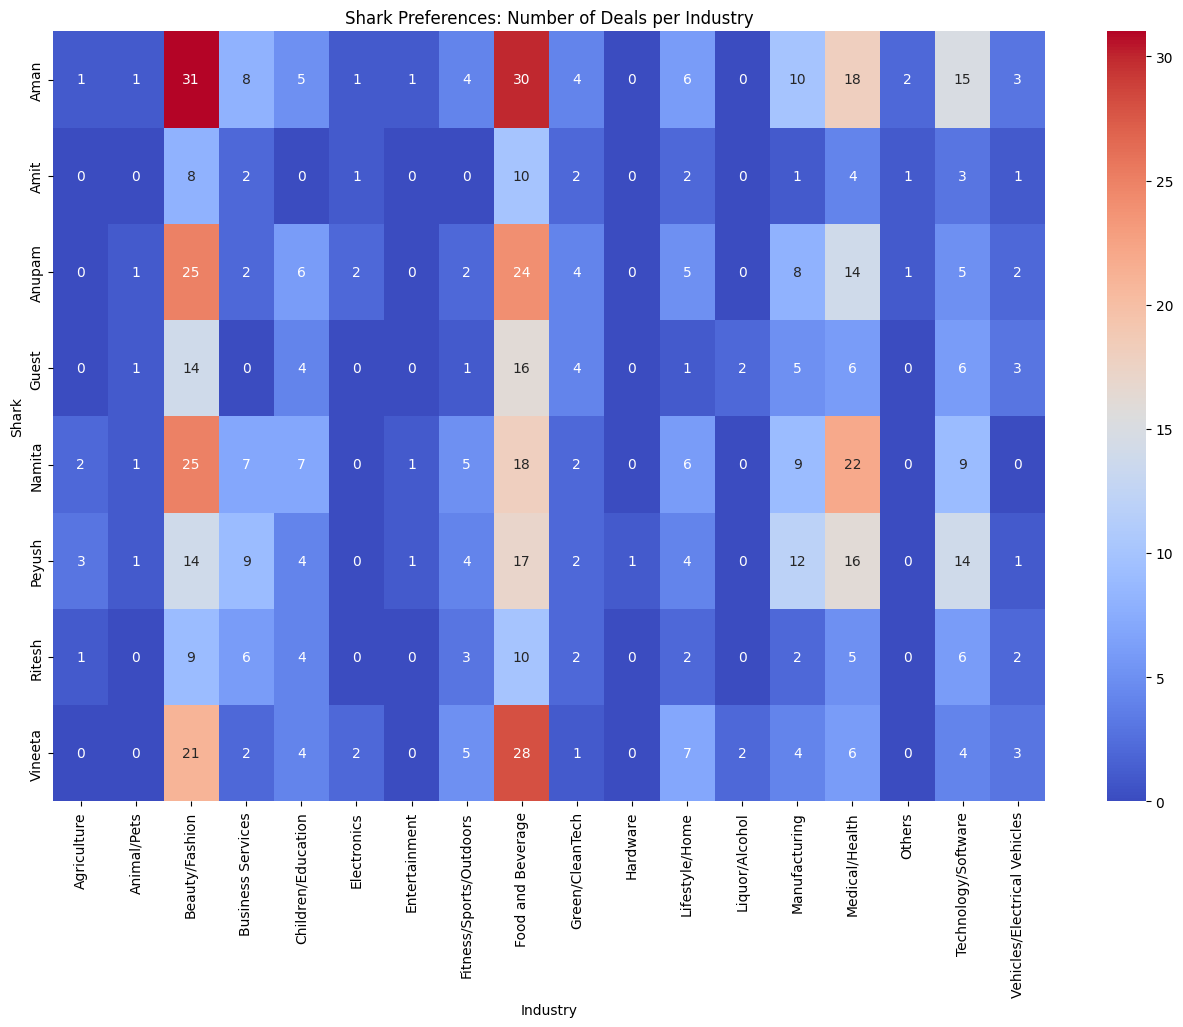

In [69]:
# Analysis of Shark Preferences by Industry

id_vars = [col for col in df.columns if 'Investment' not in col]
unpivoted_df = df.melt(id_vars=id_vars, value_vars=investment_cols, 
                       var_name='Shark_Col', value_name='Investment Amount')
unpivoted_df = unpivoted_df[unpivoted_df['Investment Amount'] > 0]
unpivoted_df['Shark Name'] = unpivoted_df['Shark_Col'].str.replace(' Investment Amount', '')

# Shark Deal Count by Industry
shark_industry_prefs = pd.crosstab(unpivoted_df['Shark Name'], unpivoted_df['Industry'])

plt.figure(figsize=(16, 10))
sns.heatmap(shark_industry_prefs, annot=True, cmap='coolwarm', fmt='g')
plt.title('Shark Preferences: Number of Deals per Industry')
plt.xlabel('Industry')
plt.ylabel('Shark')
plt.savefig('shark_industry_preferences.png')
plt.show()

In [70]:
# Equity Anomalies and Outliers
deals_df = df[df['Accepted Offer'] == 1].copy()

# Flagging Deals with > 50% Equity
high_equity_deals = deals_df[deals_df['Total Deal Equity'] > 50]
print("--- Deals where founders gave up more than 50% equity ---")
print(high_equity_deals[['Startup Name', 'Total Deal Equity', 'Deal Valuation']])

# Identifying Valuation Outliers using IQR Method
Q1 = deals_df['Deal Valuation'].quantile(0.25)
Q3 = deals_df['Deal Valuation'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

valuation_outliers = deals_df[deals_df['Deal Valuation'] > upper_bound]
print("\n--- Deals with Unusually High Valuations (Outliers) ---")
print(valuation_outliers[['Startup Name', 'Industry', 'Valuation Requested', 'Deal Valuation']].sort_values('Deal Valuation', ascending=False))

--- Deals where founders gave up more than 50% equity ---
     Startup Name  Total Deal Equity  Deal Valuation
66   Sid07Designs               75.0       33.000000
484          NOOE               51.0      980.392157

--- Deals with Unusually High Valuations (Outliers) ---
            Startup Name                 Industry  Valuation Requested  \
159                Stage            Entertainment          30000.00000   
341               WeHear           Medical/Health          25000.00000   
385                Refit              Electronics          40000.00000   
365          NasherMiles           Beauty/Fashion          40000.00000   
604               Fitelo  Fitness/Sports/Outdoors          30000.00000   
577             Palmonas           Beauty/Fashion          12600.00000   
511       SavaniHeritage        Business Services          30000.00000   
277                 Hood      Technology/Software          60000.00000   
589          EatBetterCo        Food and Beverage          1